## For testing library 


In [5]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run


# by default we assume that you have at least one CUDA-capable NVIDIA GPU
if torch.cuda.is_available():
    start_run(config_file=Path("1_basin.yml"))

# fall back to CPU-only mode
else:
    start_run(config_file=Path("1_basin.yml"), gpu=-1)

2024-06-04 10:14:56,287: Logging to /Users/abzal/Desktop/issai-srp/runs/test_run_0406_101456/output.log initialized.
2024-06-04 10:14:56,288: ### Folder structure created at /Users/abzal/Desktop/issai-srp/runs/test_run_0406_101456
2024-06-04 10:14:56,288: ### Run configurations for test_run
2024-06-04 10:14:56,289: experiment_name: test_run
2024-06-04 10:14:56,289: train_basin_file: 1_basin.txt
2024-06-04 10:14:56,289: validation_basin_file: 1_basin.txt
2024-06-04 10:14:56,290: test_basin_file: 1_basin.txt
2024-06-04 10:14:56,290: train_start_date: 1999-10-01 00:00:00
2024-06-04 10:14:56,290: train_end_date: 2008-09-30 00:00:00
2024-06-04 10:14:56,291: validation_start_date: 1980-10-01 00:00:00
2024-06-04 10:14:56,291: validation_end_date: 1989-09-30 00:00:00
2024-06-04 10:14:56,292: test_start_date: 1989-10-01 00:00:00
2024-06-04 10:14:56,292: test_end_date: 1999-09-30 00:00:00
2024-06-04 10:14:56,292: device: cpu
2024-06-04 10:14:56,292: validate_every: 3
2024-06-04 10:14:56,293: val

In [7]:
run_dir = Path("runs/test_run_0406_101456")
eval_run(run_dir=run_dir, period="test")

2024-06-04 10:26:07,557: Using the model weights from runs/test_run_0406_101456/model_epoch050.pt
# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
2024-06-04 10:26:08,404: Stored metrics at runs/test_run_0406_101456/test/model_epoch050/test_metrics.csv
2024-06-04 10:26:08,405: Stored results at runs/test_run_0406_101456/test/model_epoch050/test_results.p


In [8]:
with open(run_dir / "test" / "model_epoch050" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results.keys()

dict_keys(['01022500'])

In [11]:
print(results['01022500']['1D']['xr'])

<xarray.Dataset> Size: 58kB
Dimensions:         (date: 3652, time_step: 1)
Coordinates:
  * date            (date) datetime64[ns] 29kB 1989-10-01 ... 1999-09-30
  * time_step       (time_step) int64 8B 0
Data variables:
    QObs(mm/d)_obs  (date, time_step) float32 15kB 0.6203 0.5537 ... 0.9992
    QObs(mm/d)_sim  (date, time_step) float32 15kB 0.5945 0.5619 ... 1.895 1.635


Text(0.5, 1.0, 'Test period - NSE 0.802')

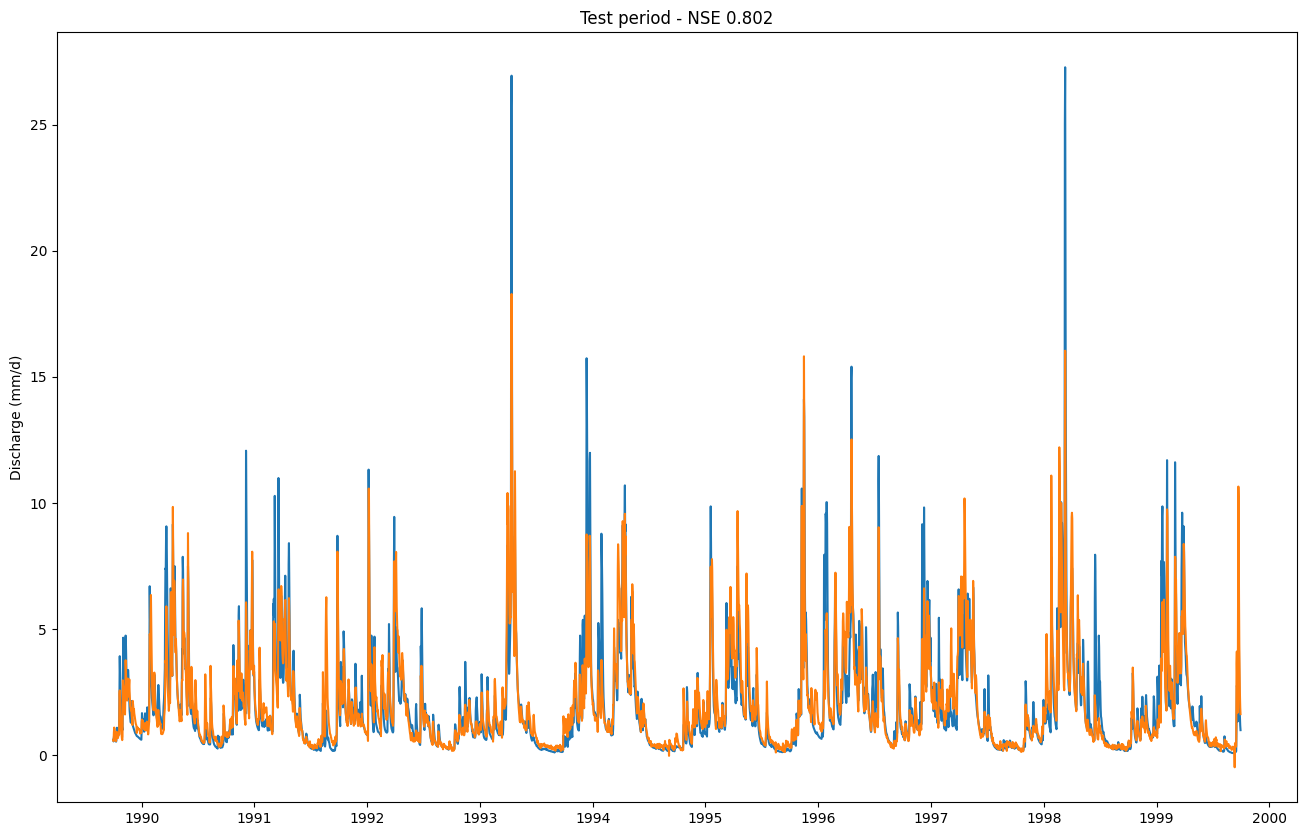

In [12]:
# extract observations and simulations
qobs = results['01022500']['1D']['xr']['QObs(mm/d)_obs']
qsim = results['01022500']['1D']['xr']['QObs(mm/d)_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (mm/d)")
ax.set_title(f"Test period - NSE {results['01022500']['1D']['NSE']:.3f}")

In [13]:
values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

NSE: 0.802
MSE: 0.975
RMSE: 0.988
KGE: 0.844
Alpha-NSE: 0.885
Beta-KGE: 1.013
Beta-NSE: 0.012
Pearson-r: 0.896
FHV: -13.115
FMS: -6.181
FLV: -874.279
Peak-Timing: 0.174
Peak-MAPE: 30.141


/Users/abzal/Desktop/issai-srp/hydrology/lib/python3.11/site-packages/neuralhydrology/datautils/utils.py:327: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/abzal/Desktop/issai-srp/hydrology/lib/python3.11/site-packages/neuralhydrology/datautils/utils.py:368: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


## Data preparation


In [1]:
from pathlib import Path
from typing import Dict, List, Tuple, Union

import numpy as np
import pandas as pd
import xarray
import torch 

from neuralhydrology.datasetzoo.basedataset import BaseDataset
from neuralhydrology.utils.config import Config
from neuralhydrology.datasetzoo.camelsus import CamelsUS  
from neuralhydrology.training.train import start_training
from neuralhydrology.nh_run import start_run, eval_run, finetune


config_path = Path('./main_run_cfg.yml')

if torch.cuda.is_available():
    start_run(config_file=config_path)

# fall back to CPU-only mode
else:
    start_run(config_file=config_path, gpu=-1)





2024-06-10 15:02:08,479: Logging to main_run_1006_150208/output.log initialized.
2024-06-10 15:02:08,479: ### Folder structure created at main_run_1006_150208
2024-06-10 15:02:08,479: ### Run configurations for main_run
2024-06-10 15:02:08,480: experiment_name: main_run
2024-06-10 15:02:08,480: run_dir: main_run_1006_150208
2024-06-10 15:02:08,480: train_basin_file: data/train_basins.txt
2024-06-10 15:02:08,481: validation_basin_file: data/valid_basins.txt
2024-06-10 15:02:08,481: test_basin_file: data/test_basins.txt
2024-06-10 15:02:08,481: train_start_date: 1999-10-01 00:00:00
2024-06-10 15:02:08,481: train_end_date: 2008-09-30 00:00:00
2024-06-10 15:02:08,482: validation_start_date: 1980-10-01 00:00:00
2024-06-10 15:02:08,482: validation_end_date: 1989-09-30 00:00:00
2024-06-10 15:02:08,482: test_start_date: 1989-10-01 00:00:00
2024-06-10 15:02:08,482: test_end_date: 1999-09-30 00:00:00
2024-06-10 15:02:08,483: per_basin_train_periods_file: None
2024-06-10 15:02:08,483: per_basin_v

/Users/abzal/Desktop/issai-srp/hydrology/lib/python3.11/site-packages/neuralhydrology/modelzoo/__init__.py:70: FutureWarning: The `LSTM` class has been renamed to `CustomLSTM`. Support for `LSTM` will we dropped in the future.
  warnings.warn(


# Epoch 1:   1%|          | 48/5844 [02:00<4:02:07,  2.51s/it, Loss: 0.3017]


KeyboardInterrupt: 

In [87]:
import pandas as pd 
from io import StringIO


data_csv = pd.read_csv("./KZ-ABA_Aksuat_meteo.txt", sep=r'\s+', engine='python', parse_dates=['date'])
data = data_csv.loc[:, ['date', 'prcp']]
    
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime('%m-%d')

data

,date,prcp
0,01-01,2.9
1,01-02,4.9
2,01-03,NaN
3,01-04,NaN
4,01-05,NaN
...,...,...
8852,03-27,NaN
8853,03-28,NaN
8854,03-29,NaN
8855,03-30,4.8


In [84]:
import numpy as np

grouped = data.groupby('date')['prcp'].apply(list).reset_index()

def drop_nan(lst):
    return [x if pd.notna(x) else 0 for x in lst]

grouped['prcp'] = grouped['prcp'].apply(drop_nan)
grouped['prcp_median'] = grouped['prcp'].apply(lambda prcp: np.median(prcp))
grouped['prcp_mean'] =  grouped['prcp'].apply(lambda prcp: np.mean(prcp))
grouped['prcp_30day_mean'] = grouped['prcp_mean'].rolling(window=30, center=True).mean()

avg_rate = grouped['prcp_mean'].mean()
max_rate = grouped['prcp_mean'].max()
delta_p = max_rate/avg_rate
s_p = grouped['prcp_mean'].idxmax()

grouped['Pt'] = avg_rate*(1+delta_p*np.sin(2*np.pi*(grouped.index-s_p)/365))
# print(s_p)
grouped.head(30)

,date,prcp,prcp_median,prcp_mean,prcp_30day_mean,Pt
0,01-01,"[2.9, 2.1, 4.3, 0, 0, 0, 0.7, 1.6, 0, 0, 1.2, ...",0.0,0.736,NaN,1.641871
1,01-02,"[4.9, 0.3, 0, 0, 0.2, 1.7, 0, 2.3, 0, 0, 0.0, ...",0.0,0.600,NaN,1.597087
2,01-03,"[0, 0.5, 0, 0, 0, 0, 0, 6.9, 0.8, 0, 0.8, 0, 0...",0.0,0.552,NaN,1.552003
3,01-04,"[0, 3.6, 0, 0, 0, 0, 0, 1.7, 1.2, 2.1, 0.6, 0,...",0.0,0.540,NaN,1.506632
4,01-05,"[0, 2.1, 0, 0, 0, 0, 0, 0, 1.0, 0.4, 4.4, 0, 0...",0.0,0.508,NaN,1.460988
5,01-06,"[0.0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0, 8.2, 0, 0, ...",0.0,0.500,NaN,1.415084
6,01-07,"[10.4, 0, 2.1, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0,...",0.0,0.992,NaN,1.368934
7,01-08,"[0.0, 0, 0.9, 0.3, 0, 0, 0, 0, 0, 0, 1.2, 0, 0...",0.0,0.224,NaN,1.322552
8,01-09,"[0.0, 0, 0, 0, 1.5, 1.0, 0.6, 0, 0, 0, 0, 0, 0...",0.0,0.492,NaN,1.275950
9,01-10,"[0.4, 0, 0, 0, 0.5, 0, 2.1, 0, 0, 0, 0, 0, 0, ...",0.0,0.648,NaN,1.229144


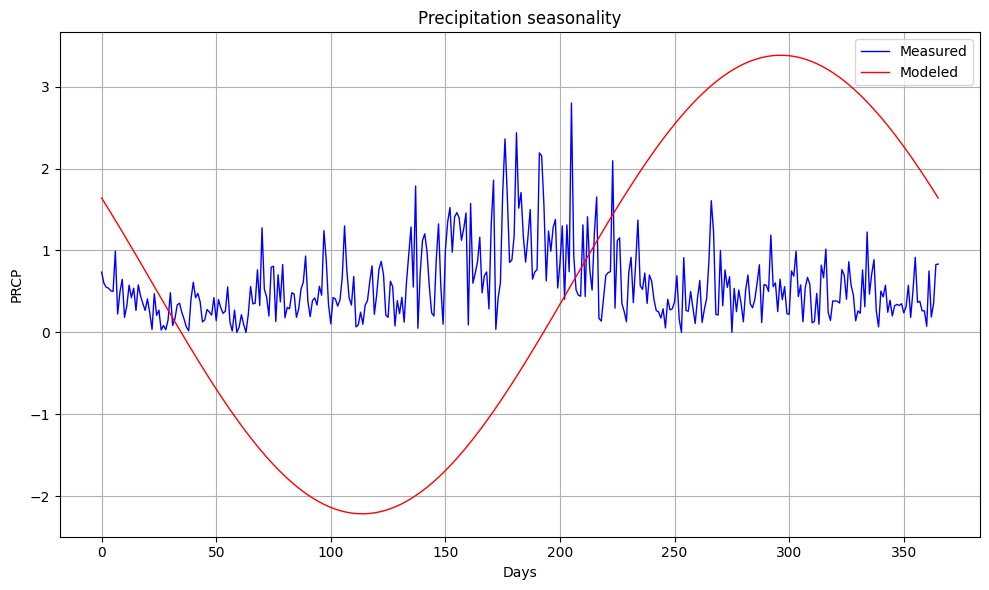

In [79]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(grouped.index.to_list(), grouped['prcp_mean'].to_list(),linewidth=1, linestyle='-', color='b', label='Measured')
plt.plot(grouped.index.to_list(), grouped['Pt'].to_list(), linewidth=1, linestyle='-', color='red', label ='Modeled')
plt.xlabel('Days')
plt.ylabel('PRCP')
plt.title('Precipitation seasonality')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()